# Graded Challenge 3
## Introduction
- Name: Izzan Dienurrahman
- Batch: HCK-003

## Objective
- Membuat model machine learning model berbasis Random Forest dan salah satu algoritma boosting lainnya untuk memprediksi kemungkinan seseorang akan meninggal atau tidak.

## Problem Statements
- Meload dataset 
- Mengidentifikasi fitur/kolom yang kiranya berkaitan terhadap `DEATH_EVENT`.
- Mengidentifikasi distribusi kolom-kolom pada dataset
- Menghandle missing value dan outlier
- Membuat pipeline untuk preprocessing dan training
- Mengevaluasi model
- Tuning hyperparameter model
- Mengevaluasi ulang model
- Menyimpan model

## Dataset Desciription
<img src='https://i.ibb.co/YBGwMXm/P1-G3-Dataset-Information.png'>

## SQL Command
>SELECT * FROM `ftds-hacktiv8-project.phase1_ftds_003_hck.heart-failure`

## Import Library

In [1]:
# import library yang dibutuhkan
from sklearn.metrics import ConfusionMatrixDisplay, classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
import phik
from phik import resources, report
from phik.report import plot_correlation_matrix
import pandas as pd
import numpy  as np
import seaborn as sns; sns.set()
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.utils import resample,shuffle
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

/opt/homebrew/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Data Loading

In [2]:
# set max display column
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('h8dsft_P1G3_Izzan.csv') # read csv insurance

In [4]:
df.head(10) # menampilkan 10 data teratas

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


Tipe data numerik kontinu yaitu `age`, `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, `serum_creatinine`, `serum_sodium`, dan `time`. Selain itu, kolom kolom lainnya tergolong data kategorikal dalam bentuk yang telah di encode. 

In [5]:
df.tail(10) # menampilkan 10 data terbawah

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Terdapat 299 entri data dan tidak terdapat standard missing values pada dataset. Semua kolom sudah sesuai dengan type datanya baik yang merupakan numerik kontinyu maupun yang kategorical dalam *encoded form*.

In [7]:
# menampilkan standar missing value pada masing masing kolom
df.isnull().sum() 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [8]:
# cek data yang memiliki duplikat
n_data_duplicate = df.duplicated().sum()
print(f"Jumlah data duplikat sebanyak {n_data_duplicate} entri")

Jumlah data duplikat sebanyak 0 entri


# Exploratory Data Analysis (EDA)

In [9]:
# menampilkan informasi deskriptif kolom data numerik
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0


[]

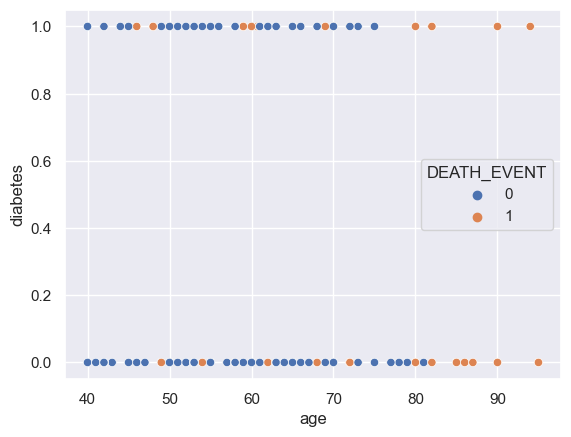

In [10]:
# plot hubungan antara umur dan diabetes terhadap kematian
sns.scatterplot(data=df, x='age', y='diabetes', hue='DEATH_EVENT')
plt.plot()

Dari grafik diatas terlihat bahwa diabetes menjadi faktor kematian pada usia lebih awal dari pasien yang tidak menderita diabetes. Terdapat penderita diabetes pada semua umur dari 40 hingga 95 tahun.

In [11]:
# melihat statistik deskriptif kolom age
df.age.describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Tercatat rata-rata pasien berumur `60 tahun`, dengan pasien termuda umur `40 tahun` dan yang tertua umur` 95 tahun`.

In [12]:
youngest_patient_death_counts = df.DEATH_EVENT[(df.age==40) & (df.DEATH_EVENT==1)].count()
avg_patient_death_counts = df.DEATH_EVENT[(df.age==60) & (df.DEATH_EVENT==1)].count()
oldest_patient_death_counts = df.DEATH_EVENT[(df.age==95) & (df.DEATH_EVENT==1)].count()

print(f"Jumlah kematian pasien termuda: {youngest_patient_death_counts}")
print(f"Jumlah kematian pasien pada umur 60: {avg_patient_death_counts}")
print(f"Jumlah kematian pasien tertua: {oldest_patient_death_counts}")

Jumlah kematian pasien termuda: 0
Jumlah kematian pasien pada umur 60: 13
Jumlah kematian pasien tertua: 2


Pasien termuda tidak mengalami kematian, pasien tertua ada 2 entri dan pasien di umur 60 yang meninggal sebanyak 13 orang.

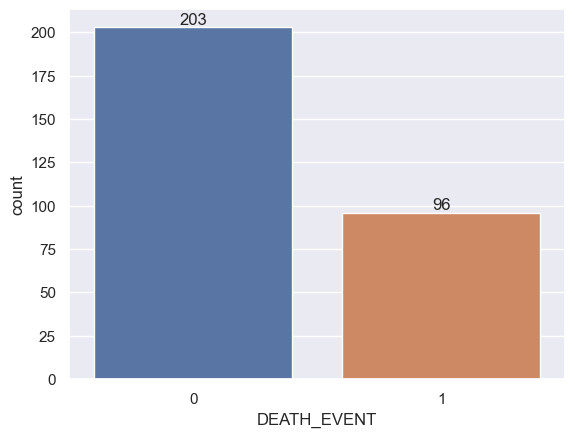

In [13]:
# plot perbandingan pasien yang meninggal dan selamat
ax = sns.countplot(x=df.DEATH_EVENT, data=df)
ax.bar_label(ax.containers[0])
plt.show()

Terdapat class imbalance pada target data dimana pasien yang selamat dua kali lebih banyak dari jumlah pasien yang meninggal

In [14]:
# construct titles for plotting
scaled_num_col = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
titles = []
for i in range(len(scaled_num_col)):
    titles.append('Distribusi ' + scaled_num_col[i])

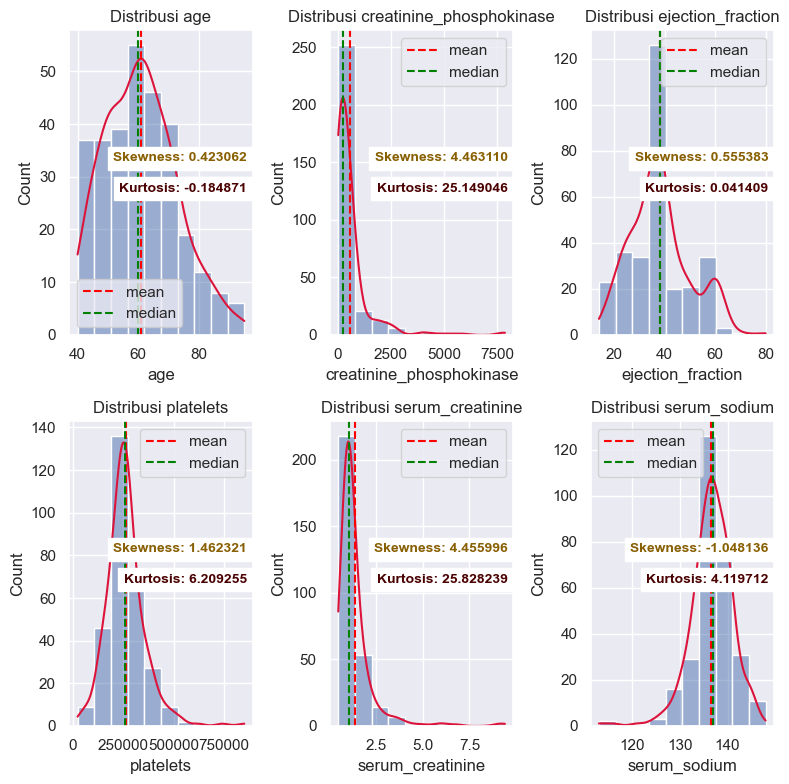

In [15]:
# plot distribusi kolom numerik
row_num=2
col_num=3
fig, axes= plt.subplots(row_num,col_num, figsize=(8,8))

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.8)
x=0
for i in range(row_num):
    for j in range(col_num):
        sns.histplot(ax=axes[i][j], data=df[scaled_num_col[x]], kde=True, bins=10)
        axes[i][j].set_title(titles[x])
        axes[i][j].lines[0].set_color('crimson')
        axes[i][j].axvline(df[scaled_num_col[x]].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
        axes[i][j].axvline(df[scaled_num_col[x]].median(), color = 'green', linestyle = 'dashed', label = 'median')
        axes[i][j].legend()
        axes[i][j].text(x=0.97, y=0.60, transform=axes[i][j].transAxes, s="Skewness: %f" % df[scaled_num_col[x]].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
        axes[i][j].text(x=0.97, y=0.50, transform=axes[i][j].transAxes, s="Kurtosis: %f" % df[scaled_num_col[x]].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
        x+=1
plt.tight_layout()

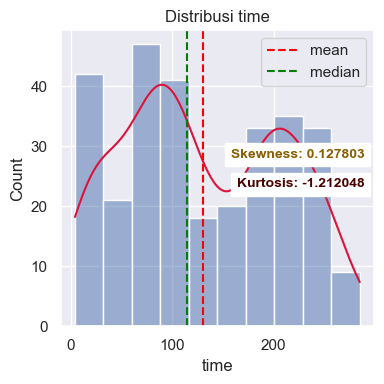

In [16]:
fig, ax= plt.subplots(1,1, figsize=(4,4))
ax = sns.histplot(data=df.time, kde=True, bins=10)
ax.set_title(titles[x])
ax.lines[0].set_color('crimson')
ax.axvline(df.time.mean(), color = 'red', linestyle = 'dashed', label = 'mean')
ax.axvline(df.time.median(), color = 'green', linestyle = 'dashed', label = 'median')
ax.legend()
ax.text(x=0.97, y=0.60, transform=ax.transAxes, s="Skewness: %f" % df.time.skew(),\
fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
backgroundcolor='white', color='xkcd:poo brown')
ax.text(x=0.97, y=0.50, transform=ax.transAxes, s="Kurtosis: %f" % df.time.kurt(),\
fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

Kolom yang terdistribusi cenderung normal diantaranya: `age`, `ejection_fraction`, dan `time` untuk yang terdistribusi miring diantaranya: `creatinine_phosphokinase`, `platelets`, `serum_creatinine`, dan `serum_sodium`.

## Feature Selection

### Phi_K Correlation Test

interval columns not set, guessing: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


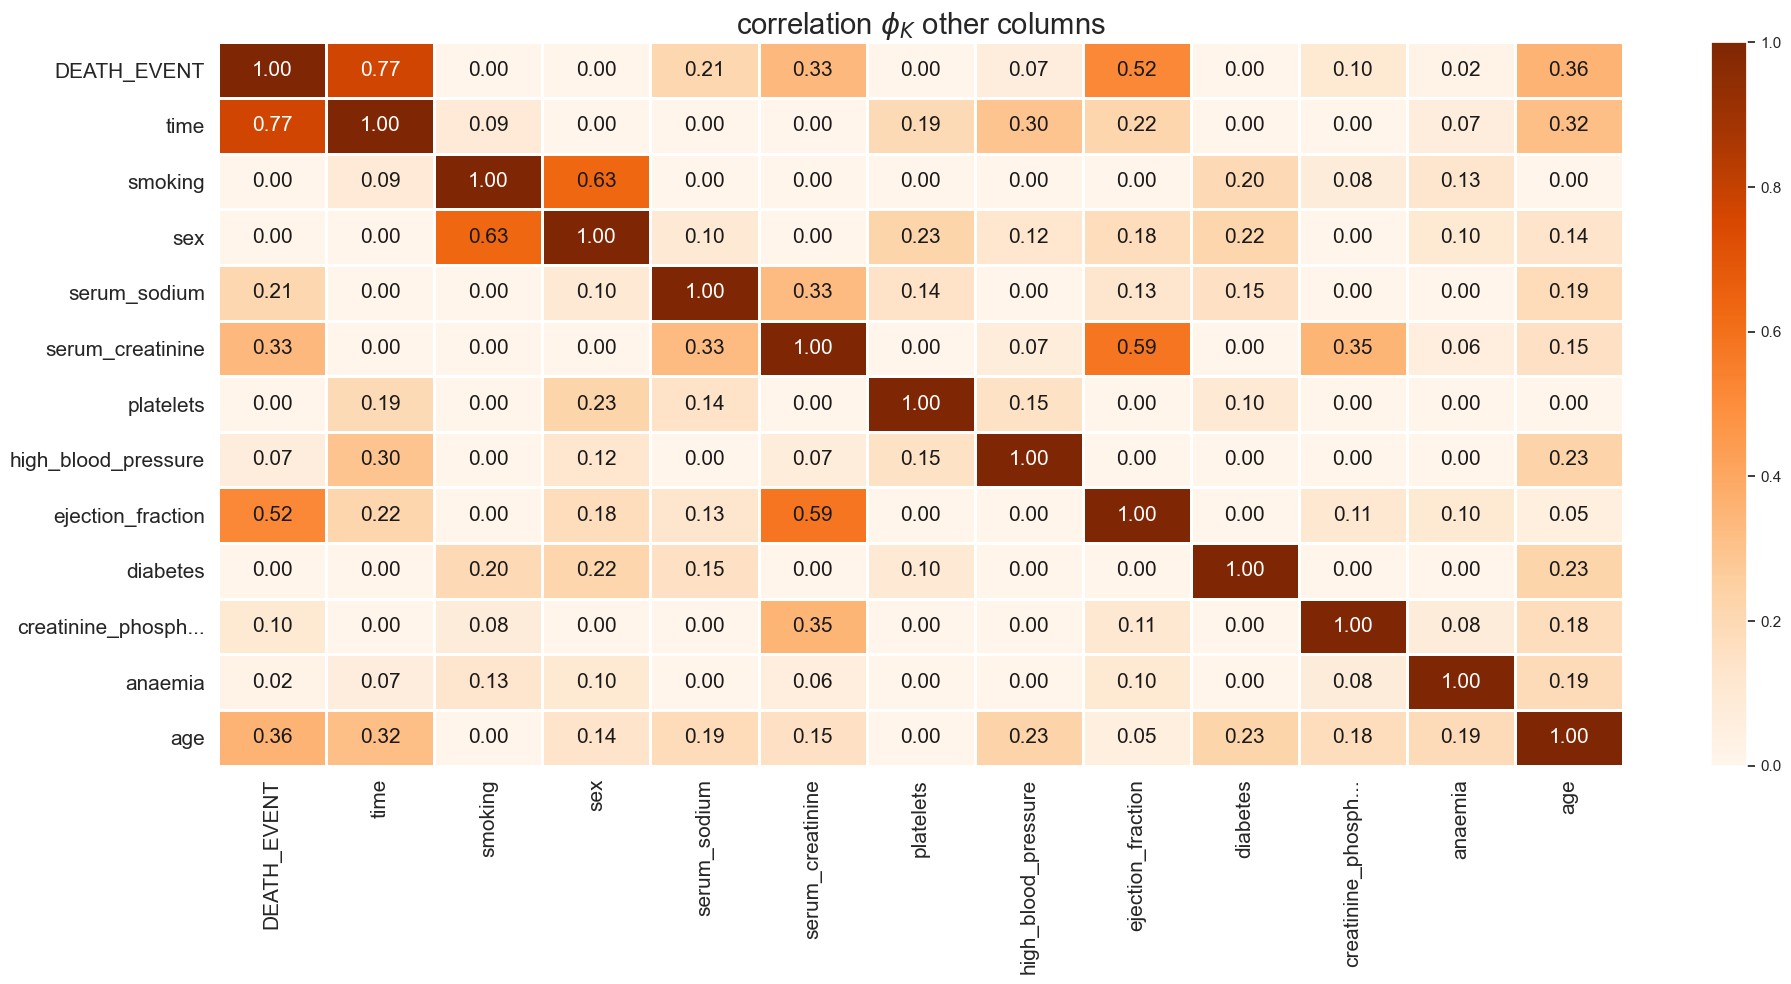

In [17]:
# get the phi_k correlation matrix between all variables
phik_matrix = df.phik_matrix()
plot_correlation_matrix(phik_matrix.values, 
                        x_labels=phik_matrix.columns, 
                        y_labels=phik_matrix.index, 
                        vmin=0, vmax=1, color_map="Oranges", 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1.5, 
                        figsize=(20,10))
plt.tight_layout()
# sns.heatmap(phik_matrix, annot= True, vmin=0, vmax=1, cmap='Accent', figsize=(12,8))

In [18]:
# cek korelasi yang memiliki signifikansi terhadap death_event
df.phik_matrix().DEATH_EVENT.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


DEATH_EVENT                 1.000000
time                        0.772675
ejection_fraction           0.515675
age                         0.356298
serum_creatinine            0.332330
serum_sodium                0.214335
creatinine_phosphokinase    0.101787
high_blood_pressure         0.067031
anaemia                     0.018687
diabetes                    0.000000
platelets                   0.000000
sex                         0.000000
smoking                     0.000000
Name: DEATH_EVENT, dtype: float64

Berdasarkan metrik 𝜙 k (Phik), terlihat ada 8 fitur yang relatif signifikan berkorelasi dengan kolom target yaitu:
- `time`, `ejection_fraction`, `age`, `serum_creatinine`, `serum_sodium`, `creatinine_phosphokinase`, `high_blood_pressure`, dan `anaemia` (dari tinggi ke rendah).

In [19]:
# menghitung korelasi antar kolom numerik berdasarkan metode pearson
df.corr().DEATH_EVENT.sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

Berdasarkan korelasi dengan metode pearson: `diabetes`, `platelets`, `sex`, dan `smoking` memiliki korelasi yang tidak nol, maka tidak ada fitur yang tidak akan di drop.

In [20]:
# menyimpan semua fitur dalam sebuah list
all_features = df.columns.tolist()

In [21]:
# menampilkan selected features
selected_features = all_features
selected_features

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT']

In [22]:
# simpan df dengan fitur yang sudah diseleksi
df_selected = df[selected_features].copy()

In [23]:
# menampilkan final df dengan fitur yang sudah di seleksi
df_selected.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1


# Data Preprocessing
## Train-Test Split

In [24]:
#split antara fitur dan target
X = df_selected.drop('DEATH_EVENT',axis=1)
y = df_selected['DEATH_EVENT']

In [25]:
#split antara train dan test dengan cara stratifikasi
data_train, data_test= train_test_split(df_selected, stratify=y,test_size=0.3, random_state=42) # untuk kebutuhan class imbalance handling

print(f'train size: {data_train.shape}')
print(f'test size: {data_test.shape}')

train size: (209, 13)
test size: (90, 13)


In [26]:
# menampilkan 5 data fitur teratas
data_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
230,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
254,70.0,0,66,1,45,0,249000.00,0.80,136,1,1,80,0
62,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107,0
147,64.0,0,143,0,25,0,246000.00,2.40,135,1,0,214,0
258,60.0,1,1082,1,45,0,250000.00,6.10,131,1,0,107,0


In [27]:
# fitur numerikal yang perlu di scaling
scaled_num_col

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [28]:
# fitur categorical yang sudah dalam bentuk encode
cat_col = ['anaemia','diabetes','high_blood_pressure','sex','smoking']
cat_col

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

## Outlier Handling
Outlier handling akan dilakukan pada fitur numerikal kontinu dengan melihat distribusi dan outliernya terlebih dahulu. Untuk outlier dibawah 5% akan dilakukan trimming, untuk outlier diatas 5% akan dilakukan censoring/capping.

In [29]:
# fungsi untuk membuat histogram dan boxplot dari suatu fitur
def plot_diagnostic(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=10)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1], whis=1.5)
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' is normally distributed".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' is moderately right skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' is highly right skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' is moderately left skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' is highly left skewed".format(col))

In [30]:
# fungsi untuk mendapatkan upper dan lower boundary dari suatu distribusi
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

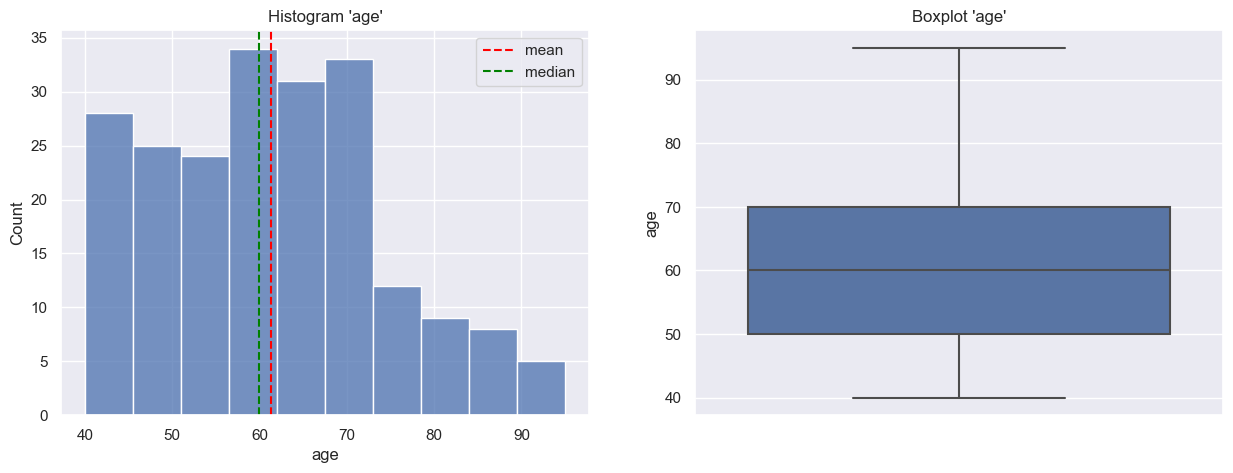

age Kurtosis: -0.3036080263258061
age Skewness: 0.38885482603753013
Columns 'age' is normally distributed


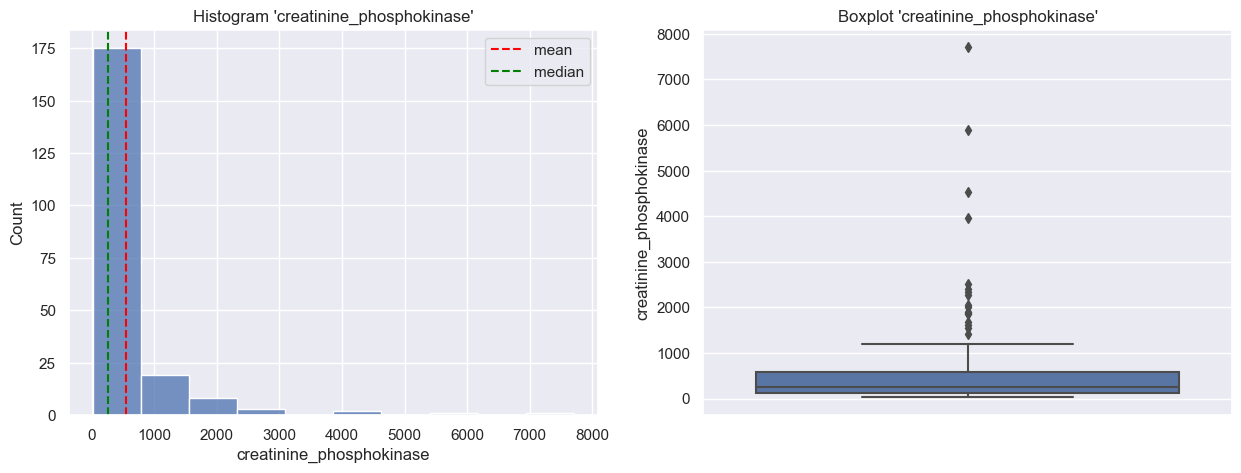

creatinine_phosphokinase Kurtosis: 30.172029181812974
creatinine_phosphokinase Skewness: 4.80099789179221
Columns 'creatinine_phosphokinase' is highly right skewed


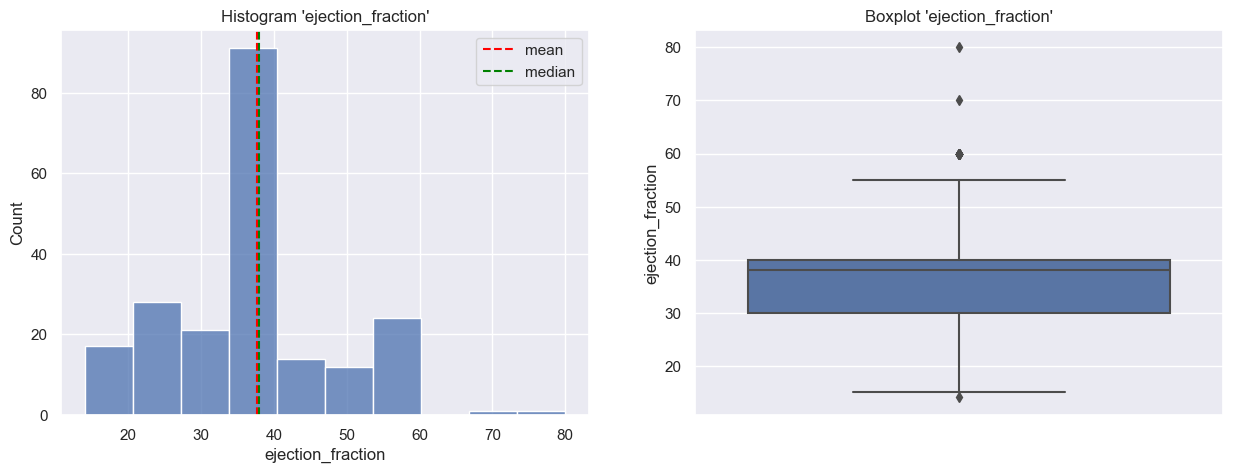

ejection_fraction Kurtosis: 0.3070999897645703
ejection_fraction Skewness: 0.6199143812970908
Columns 'ejection_fraction' is moderately right skewed


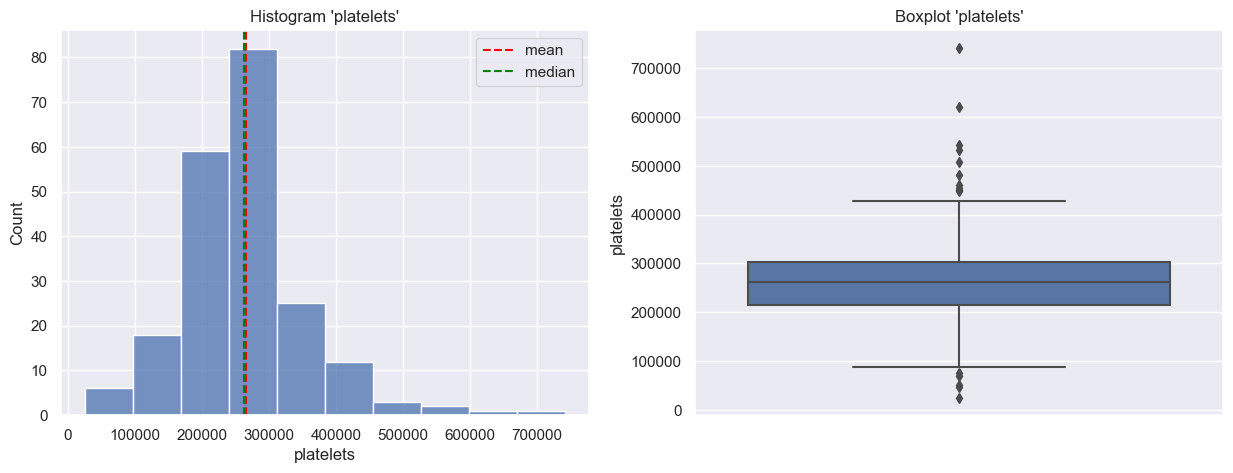

platelets Kurtosis: 3.957644781413742
platelets Skewness: 1.1023224171882173
Columns 'platelets' is highly right skewed


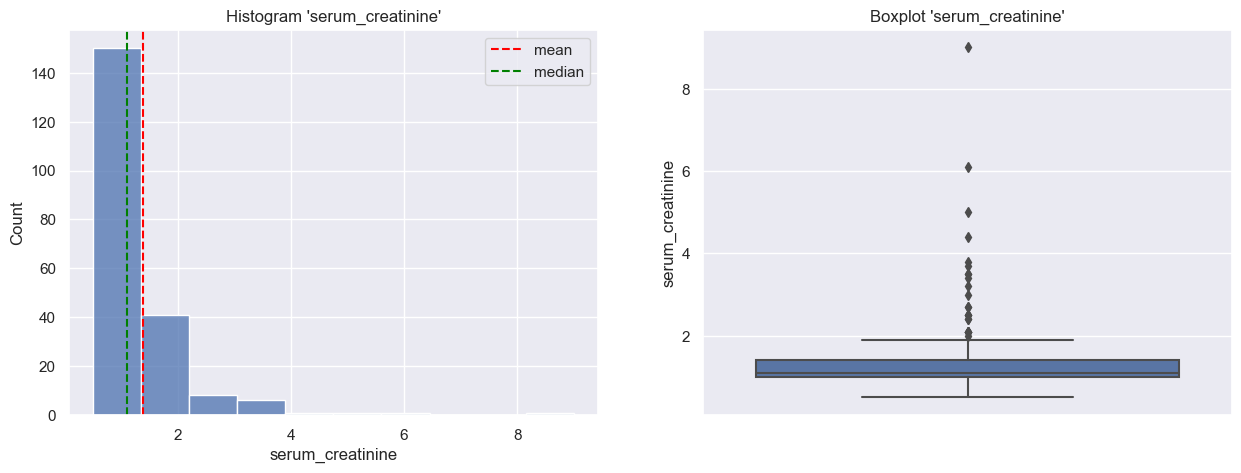

serum_creatinine Kurtosis: 27.37349666020198
serum_creatinine Skewness: 4.376788921125964
Columns 'serum_creatinine' is highly right skewed


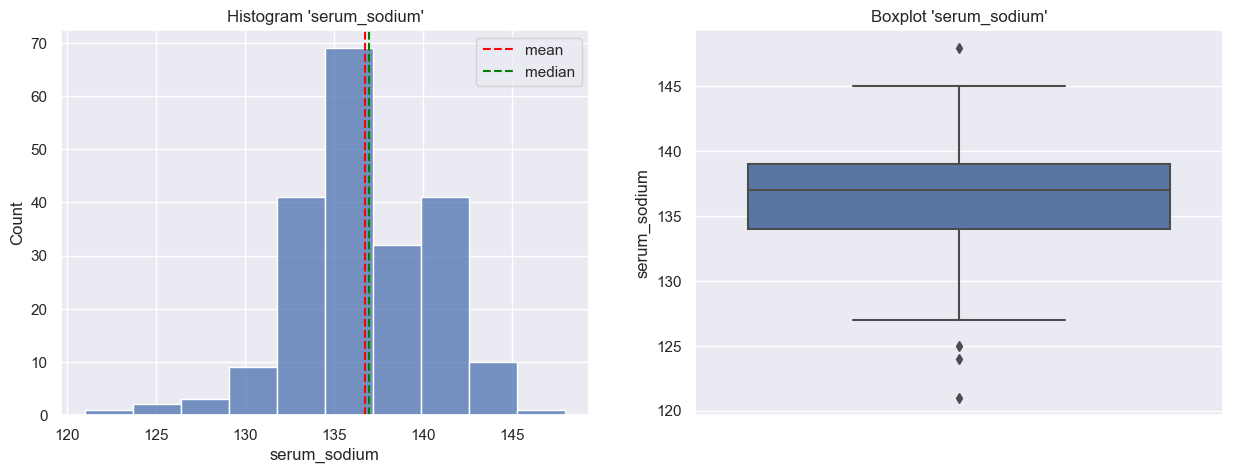

serum_sodium Kurtosis: 1.4242581971921897
serum_sodium Skewness: -0.41491251764831233
Columns 'serum_sodium' is normally distributed


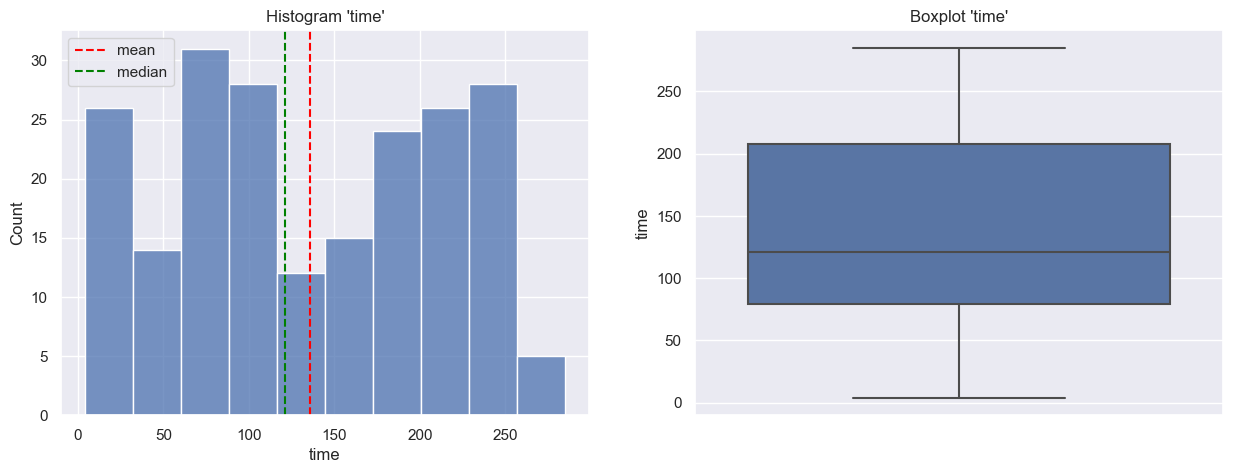

time Kurtosis: -1.2367422505003904
time Skewness: 0.03220194329299806
Columns 'time' is normally distributed


In [31]:
# plot semua fitur pada data train untuk melihat distribusi sekaligus outliernya
for i in range(len(scaled_num_col)):
    plot_diagnostic(data_train, scaled_num_col[i])

In [32]:
# variable container upper dan lower limit semua kolom numerik
upper = []
lower = []

In [33]:
# simpan value upper dan lower ke dalam list yang sudah dibuat sebelumnya
for i in range(len(scaled_num_col)):
    upper_, lower_ = find_skewed_boundaries(df=data_train, variable=scaled_num_col[i], distance=1.5)
    upper.append(upper_)
    lower.append(lower_)

# simpan value upper dan lower ke dictionary sesuai nama fiturnya dengan format (nama_fitur: upper,lower)
low_up_dict = {}
for i in range(len(scaled_num_col)):
    low_up_dict[scaled_num_col[i]]=[lower[i],upper[i]]

In [34]:
# menampilan dicionary lower dan upper limit value suatu fitur
low_up_dict

{'age': [20.0, 100.0],
 'creatinine_phosphokinase': [-568.0, 1272.0],
 'ejection_fraction': [15.0, 55.0],
 'platelets': [84500.0, 432500.0],
 'serum_creatinine': [0.40000000000000013, 1.9999999999999998],
 'serum_sodium': [126.5, 146.5],
 'time': [-114.5, 401.5]}

In [35]:
#list containing outliers percentage
trimmed_outliers = []
censored_outliers = []
# menghitung dan menampilkan persentase outlier dari tiap fitur
for i in range(len(scaled_num_col)):
    num_outlier = data_train[scaled_num_col[i]][(data_train[scaled_num_col[i]] > upper[i]) | (data_train[scaled_num_col[i]] < lower[i])].shape[0]
    outlier_percentage = num_outlier/data_train.shape[0]*100
    if (outlier_percentage<5):
        trimmed_outliers.append([scaled_num_col[i],outlier_percentage])
    else:
        censored_outliers.append([scaled_num_col[i],outlier_percentage])

print("Trimmed Outliers Consideration:")
for i in trimmed_outliers:
    print(f'\tPercentage of outlier in \033[1m{i[0]}\033[0m is {i[1]:.2f}%')

print("Censored Outliers Consideration:")
for i in censored_outliers:
    print(f'\tPercentage of outlier in \033[1m{i[0]}\033[0m is {i[1]:.2f}%')

Trimmed Outliers Consideration:
	Percentage of outlier in age is 0.00%
	Percentage of outlier in serum_sodium is 1.91%
	Percentage of outlier in time is 0.00%
Censored Outliers Consideration:
	Percentage of outlier in creatinine_phosphokinase is 8.13%
	Percentage of outlier in ejection_fraction is 11.96%
	Percentage of outlier in platelets is 7.18%
	Percentage of outlier in serum_creatinine is 11.48%


Outlier pada `serum_sodium` relatif sedikit maka akan di trim, sedangkan outlier pada `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, dan `serum_creatinine` relatif banyak akan di trim

### Trimming
Trimming outlier pada fitur `serum_sodium`

In [36]:
# ambil index outlier fitur serum_sodium
index_outlier_serum_sodium = data_train.serum_sodium[(data_train.serum_sodium < low_up_dict['serum_sodium'][0]) | (data_train.serum_sodium > low_up_dict['serum_sodium'][1])].index

# drop outlier pada kolom serum_sodium 
data_train.drop(index=index_outlier_serum_sodium, inplace=True)

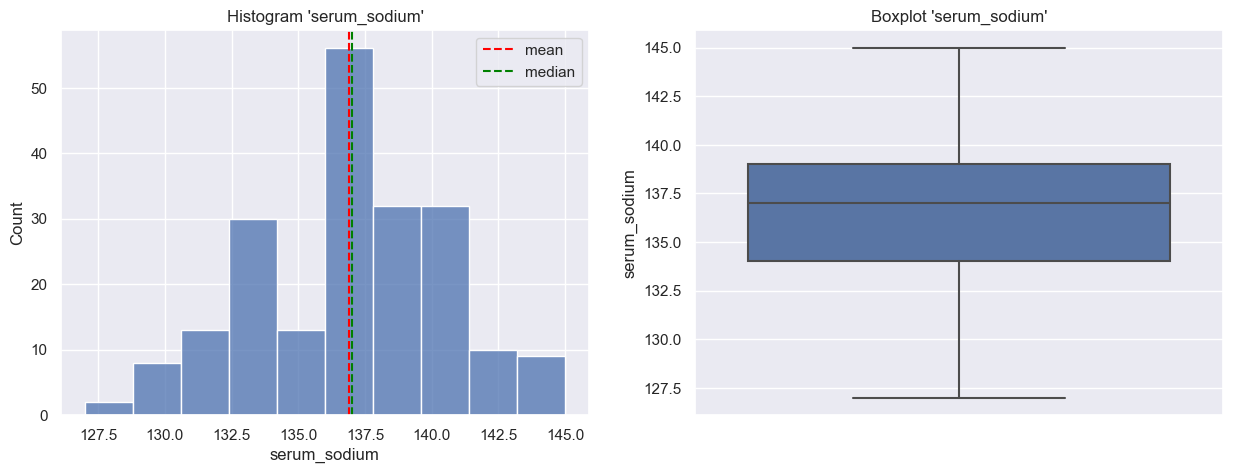

serum_sodium Kurtosis: -0.028859391456868888
serum_sodium Skewness: -0.010722284401754227
Columns 'serum_sodium' is normally distributed

Skewness Value :  -0.010722284401754227


In [37]:
# fitur serum_sodium setelah dilakukan trimming
plot_diagnostic(data_train, 'serum_sodium')
print('\nSkewness Value : ', data_train['serum_sodium'].skew())

### Censoring/Capping
Capping outlier pada fitur `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, dan `serum_creatinine` 

In [38]:
# define kolom yang ingin di cap
capped_col = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine']

# Create the capper
windsoriser = Winsorizer(capping_method='iqr',
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=capped_col)

# melakukan capping pada data train
data_train = windsoriser.fit_transform(data_train)

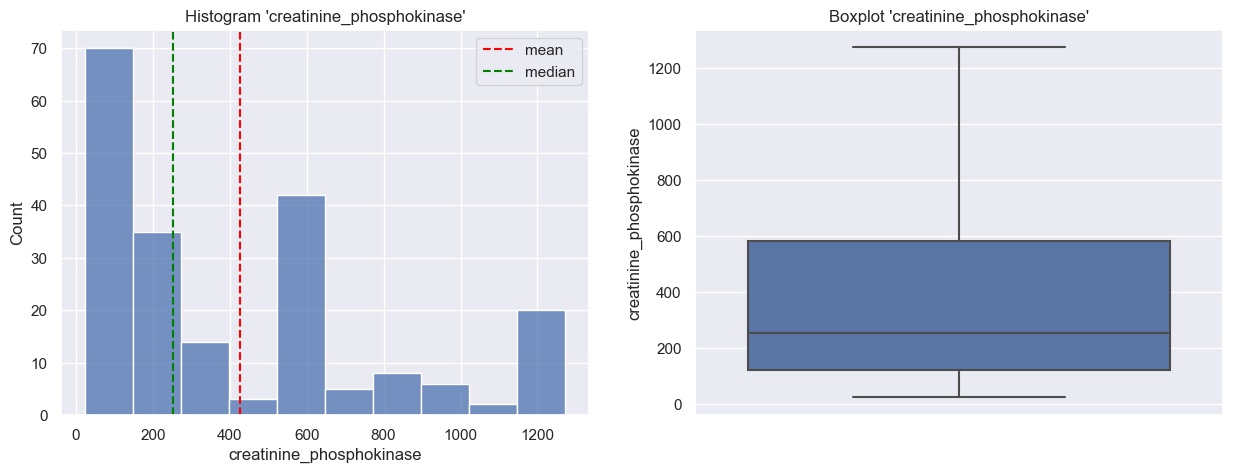

creatinine_phosphokinase Kurtosis: -0.0995631918183939
creatinine_phosphokinase Skewness: 0.9906182329361573
Columns 'creatinine_phosphokinase' is moderately right skewed


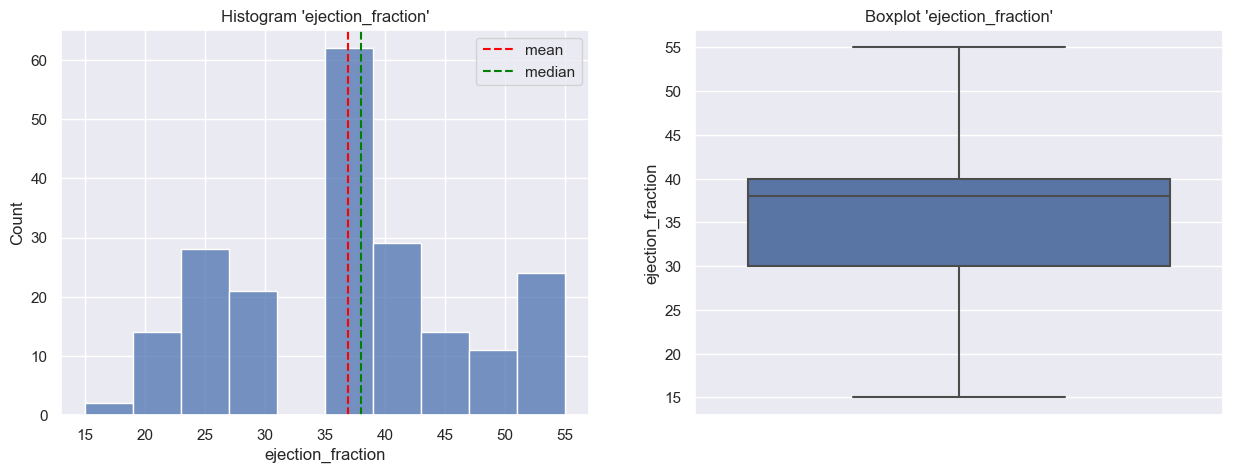

ejection_fraction Kurtosis: -0.583337992425836
ejection_fraction Skewness: 0.16035699203063616
Columns 'ejection_fraction' is normally distributed


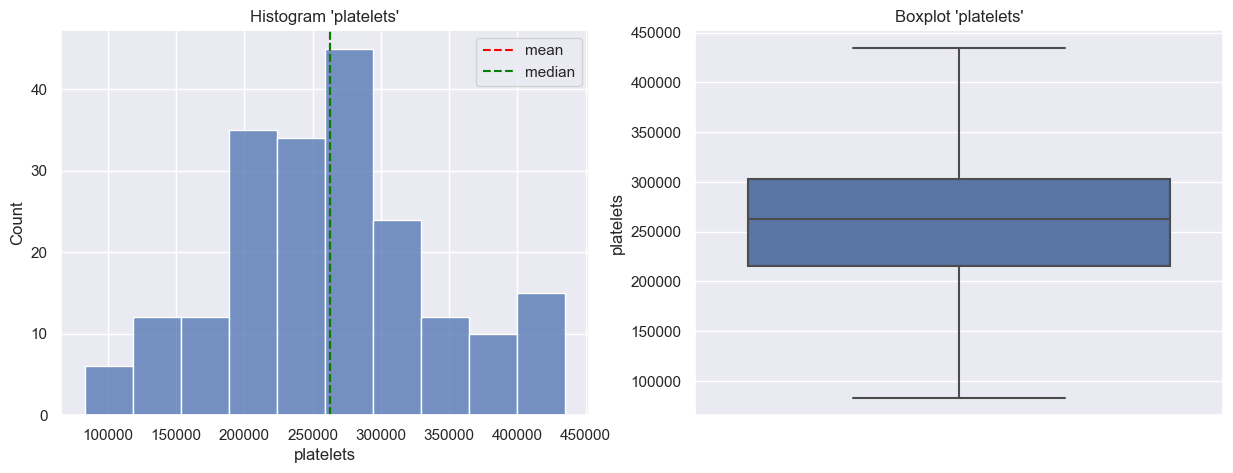

platelets Kurtosis: 0.01684411379458295
platelets Skewness: 0.271042137460871
Columns 'platelets' is normally distributed


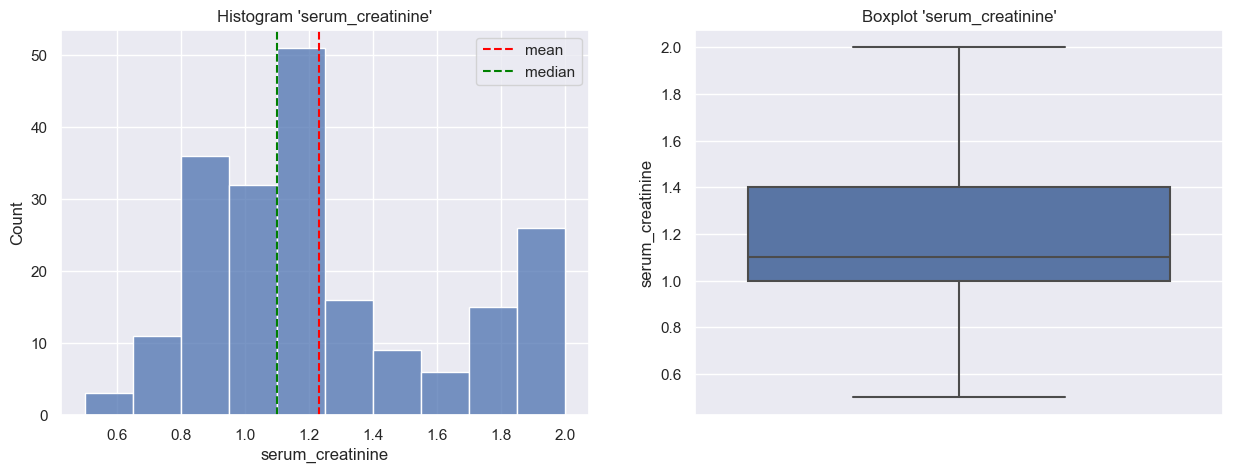

serum_creatinine Kurtosis: -0.5238291324485553
serum_creatinine Skewness: 0.7256575743894698
Columns 'serum_creatinine' is moderately right skewed


In [39]:
# plot fitur setelah dilakukkan capping
for i in range(len(capped_col)):
    plot_diagnostic(data_train, capped_col[i])

In [40]:
scaled_num_col

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

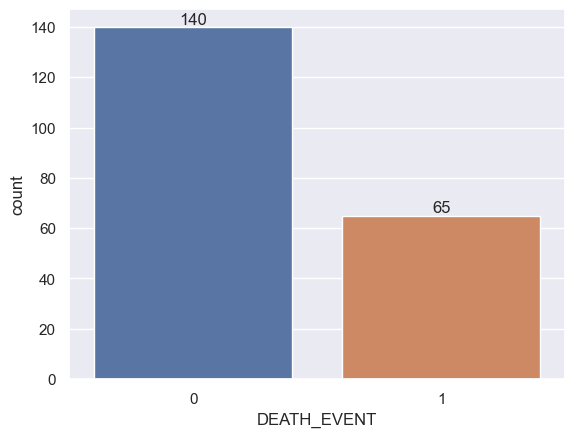

In [41]:
# plot perbandingan pasien yang meninggal dan selamat
ax = sns.countplot(x=data_train.DEATH_EVENT, data=data_train)
ax.bar_label(ax.containers[0])
plt.show()

In [42]:
# original train-test set tanpa class imbalance handling
X_train = data_train.iloc[:,:-1]
y_train = data_train.iloc[:,-1]
X_test  = data_test.iloc[:,:-1]
y_test  = data_test.iloc[:,-1]

## Class Imbalance Handling
Pendekatan yang dilakukan untuk class imbalance handling adalah *`upsampling`* dengan teknik SMOTE.

In [43]:
data_train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [44]:
# SMOTE
from imblearn.over_sampling import SMOTENC
sm = SMOTENC(random_state=42, categorical_features=[1,3,5,9,10],sampling_strategy='minority')
X_train_upsampled, y_train_upsampled = sm.fit_resample(X_train, y_train)

In [45]:
# gabungan data train upsampled dengan target
data_train_upsampled = X_train_upsampled.copy()
data_train_upsampled['death'] = y_train_upsampled

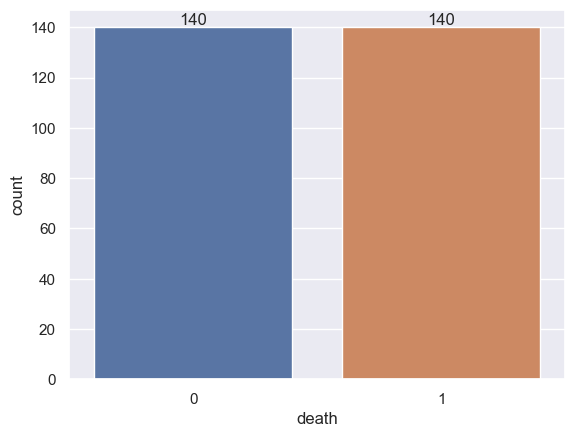

In [46]:
# plot perbandingan jumlah target setelah class imbalance handling
ax = sns.countplot(x=data_train_upsampled.death, data=data_train_upsampled)
ax.bar_label(ax.containers[0])
plt.show()

## Pipelining
### Scaling & Encoding
- Untuk scaling, penulis akan melakukan scaling pada fitur `age`, `creatinine_phosphokinase`, `ejection_fraction`, `platelets`, `serum_creatinine`, `serum_sodium`, dan `time` dengan pertimbangan data fitur tersebut merupakan jenis data numerikal kontinyu. Dikethui bahwa distribusi fitur-fitur diatas tidak terdistribusi normal, maka penulis akan menggunakan  *`minmax scaler`*. 
- Penulis `tidak` menggunakan `encoding` karena data kategorikal sudah dalam *encoded form*
- Penulis akan membungkus fungsi scaling ini kedalam column transformer dengan variabel bernama *`preprocessor`*

In [47]:
#mendefinisikan kolom/fitur numerik yang akan di transform
scaled_num_features = scaled_num_col
num_transformer = MinMaxScaler()

# membuat pipeline data preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("mm_scale", num_transformer, scaled_num_features),
    ],
    remainder='passthrough'
)

### Model Definition
Model yang akan digunakan adalah: `Random Forest` dan `AdaBoost`. Penulis akan melakukan training data pada semua model terlebih dahulu dengan parameter default menggunakan *`cross validation`*. Kemudian kedua model akan dipilih dan dilakukan `hyperparameter tuning`, dan terakhir `mengevaluasi` performa `sebelum` dan `sesudah` melakukan tuning pada model tersebut sebelum melakukan *`deployment`*.

In [48]:
# instansiasi classifier dengan default parameter
rf_model = RandomForestClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
gbc_model = GradientBoostingClassifier(random_state=42)

### Dengan Pipeline Preprocessor
Berikut adalah pipeline untuk setiap classifier

In [49]:
# contruct data training pipeline (preprocessing + model fitting)
rf_clf = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("estimator",rf_model)
    ]
)
ada_clf = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("estimator",ada_model)
    ]
)

gbc_clf = Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("estimator",gbc_model)
    ]
)

## Model Training
Train data dengan pipeline: preprocessor + estimator.

In [50]:
# train data pada model decision tree
rf_clf.fit(X_train_upsampled,y_train_upsampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mm_scale', MinMaxScaler(),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time'])])),
                ('estimator', RandomForestClassifier(random_state=42))])

In [51]:
# train data pada model adaboost
ada_clf.fit(X_train_upsampled,y_train_upsampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mm_scale', MinMaxScaler(),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time'])])),
                ('estimator', AdaBoostClassifier(random_state=42))])

In [52]:
# train data pada model grandient boosting
gbc_clf.fit(X_train_upsampled,y_train_upsampled)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('mm_scale', MinMaxScaler(),
                                                  ['age',
                                                   'creatinine_phosphokinase',
                                                   'ejection_fraction',
                                                   'platelets',
                                                   'serum_creatinine',
                                                   'serum_sodium', 'time'])])),
                ('estimator', GradientBoostingClassifier(random_state=42))])

## Model Evaluation
Dengan pertimbangan meminimalisir angka *`False Negative`*, penulis menggunakan metric *`recall`* dimana dengan konteks prediksi gagal jantung, penulis lebih menekankan pada pasien yang seharusnya diprediksi terkena serangan jantung (*`target 1=True 0=False`*).

In [53]:
#set metric
metric = 'recall'
n_split = 5

n_cv = 5
# checking cross validation score
cv_tree_model = cross_val_score(rf_clf, X_train_upsampled, y_train_upsampled, cv=n_cv, scoring=metric)
cv_rnd_model = cross_val_score(ada_clf, X_train_upsampled, y_train_upsampled, cv=n_cv, scoring=metric)
cv_gbc_model = cross_val_score(gbc_clf, X_train_upsampled, y_train_upsampled, cv=n_cv, scoring=metric)


name_model = []
cv_scores=0
for cv,name in zip([cv_tree_model, cv_rnd_model, cv_gbc_model],['rf_model','ada_model','gbc_model']):
    print(name)
    print(f'{metric} - All - Cross Validation  : ', cv)
    print(f'{metric} - Mean - Cross Validation : ', cv.mean())
    print(f'{metric} - Std - Cross Validation  : ', cv.std())
    print(f'{metric} - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass

rf_model
recall - All - Cross Validation  :  [0.78571429 0.82142857 0.92857143 1.         0.96428571]
recall - Mean - Cross Validation :  0.9
recall - Std - Cross Validation  :  0.08268454930564448
recall - Range of Test-Set       :  0.8173154506943555 - 0.9826845493056445
--------------------------------------------------
ada_model
recall - All - Cross Validation  :  [0.64285714 0.60714286 0.89285714 0.89285714 1.        ]
recall - Mean - Cross Validation :  0.8071428571428572
recall - Std - Cross Validation  :  0.15419309389230648
recall - Range of Test-Set       :  0.6529497632505507 - 0.9613359510351637
--------------------------------------------------
gbc_model
recall - All - Cross Validation  :  [0.64285714 0.75       0.89285714 0.96428571 1.        ]
recall - Mean - Cross Validation :  0.85
recall - Std - Cross Validation  :  0.1343920551587627
recall - Range of Test-Set       :  0.7156079448412372 - 0.9843920551587627
--------------------------------------------------


In [54]:
# predict test set dengan model random forest
y_pred_test_rf = rf_clf.predict(X_test)

# predict test set dengan model adaboost
y_pred_test_ada = ada_clf.predict(X_test)

# predict test set dengan model gradientboost
y_pred_test_gbc = gbc_clf.predict(X_test)

# print recall score atau metrik yang meminimalisir false negative
recall_tree = recall_score(y_test,y_pred_test_rf,pos_label=1,average='binary')
print(f'Baseline Random Forest Model Recall Score test-set\t: {recall_tree}')

# print recall score atau metrik yang meminimalisir false negative
recall_ada = recall_score(y_test,y_pred_test_ada,pos_label=1,average='binary')
print(f'Baseline AdaBoost Model Recall Score test-set\t\t: {recall_ada}')

# print recall score atau metrik yang meminimalisir false negative
recall_gbc = recall_score(y_test,y_pred_test_gbc,pos_label=1,average='binary')
print(f'Baseline GradientBoosting Model Recall Score test-set\t: {recall_gbc}')

Baseline Random Forest Model Recall Score test-set	: 0.7586206896551724
Baseline AdaBoost Model Recall Score test-set		: 0.7586206896551724
Baseline GradientBoosting Model Recall Score test-set	: 0.7931034482758621


- Hasil evaluasi baseline model dengan *`cross validation`* menunjukkan bahwa model *`Random Forest`* mendapat `mean recall` sebesar `0.90` terhadap data train dan `0.758` terhadap test-set. 
- Disisi lain *`AdaBoost`* mendapat mean recall *`cross validation`* sebesar `0.80` terhadap train-set dan `0.758` terhadap test-set. 
- Terakhir, `GradientBoosting` mendapat `mean recall` *`cross validation`* sebesar `0.85` terhadap train-set dan `0.79` terhadap test-set. 
- Kedua model *`Random Forest`* dan *`AdaBoost`* mendapat nilai `recall` yang identik terhadap test-set namun tidak pada `GradientBoosting` yang lebih unggul dari keduanya.

## Model Hyperparameter Tuning
Dari model yang sudah ditrain, penulis akan melakukan tuning hyperparameter terhadap kedua model tersebut menggunakan *`RandomSearchCV`* untuk memaksimalkan metrik guna mendapatkan model yang optimal.

### Random Forest Model Tuning
 Melalui *`trial and error`* penulis mendapati `F1-score` adalah metric terbaik untuk *`tuning`* agar model *`Random Forest`* tidak overfit terhadap nilai `recall` *train-set*

In [55]:
# choose tuning metric to be optimized for
metric_tuning = 'f1'

# parameter random forest
param_rf = {
    'estimator__n_estimators': [100,200],
    'estimator__criterion': ['gini', 'entropy', 'log_loss'],
    'estimator__max_depth': [1,2,4,8],
    'estimator__min_samples_split':[2,4,8,16],
    'estimator__min_samples_leaf':[1,2,3,4,5],
    'estimator__max_leaf_nodes':[1,2,None],
    'estimator__min_impurity_decrease': np.arange(0, 1, 0.001).tolist(),
    'estimator__ccp_alpha': np.arange(0, 1, 0.001).tolist()
    }

# tuning hyperparameter 
rf_randcv = RandomizedSearchCV(rf_clf, param_distributions=param_rf,n_iter=100, cv=n_split, scoring=metric_tuning, n_jobs=-1, random_state=42)
rf_randcv.fit(X_train_upsampled, y_train_upsampled)
print(f"Random Forest Model Hyperparameter Tuning...")
print(f"Best cross-validation {metric_tuning}: {rf_randcv.best_score_:.2f}")
print(f"{metric_tuning} test set score: {rf_randcv.score(X_test, y_test):.2f}")
print(f"Best parameters: {rf_randcv.best_params_}")

Random Forest Model Hyperparameter Tuning...
Best cross-validation f1: 0.81
f1 test set score: 0.87
Best parameters: {'estimator__n_estimators': 200, 'estimator__min_samples_split': 4, 'estimator__min_samples_leaf': 2, 'estimator__min_impurity_decrease': 0.062, 'estimator__max_leaf_nodes': None, 'estimator__max_depth': 2, 'estimator__criterion': 'gini', 'estimator__ccp_alpha': 0.062}


In [56]:
# predict train-set setelah tuning
y_pred_train_rf_randcv = rf_randcv.predict(X_train_upsampled)

# predict test-set setelah tuning
y_pred_test_rf_randcv = rf_randcv.predict(X_test)

In [57]:
# print recall score terhadap test set setelah tuning
recall_score(y_true=y_test,y_pred=y_pred_test_rf_randcv)

0.9310344827586207

`Pre-tuning` `Random Forest` model mendapat nilai recall terhadap test-set sebesar `0.75`, dan `post-tuning` sebesar `0.93` terhadap test-set

#### Random Forest Post-Tuning Model Report
Untuk mengetahui apakah post-tuning model tergolong `overfit`, `underfit`, atau `good-fit`.

In [58]:
# train-set
print(classification_report(y_train_upsampled,y_pred_train_rf_randcv))

# test-set
print(classification_report(y_test,y_pred_test_rf_randcv))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       140
           1       0.82      0.80      0.81       140

    accuracy                           0.81       280
   macro avg       0.81      0.81      0.81       280
weighted avg       0.81      0.81      0.81       280

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        61
           1       0.82      0.93      0.87        29

    accuracy                           0.91        90
   macro avg       0.89      0.92      0.90        90
weighted avg       0.92      0.91      0.91        90



`Post-tuning` model didapati performa test-set jauh `melampaui` train-set sebesar `13%`. Sejujurnya penulis tidak berekspektasi sebagus ini dan merasa bahwa ini `anomali` maka penulis merasa model ini tergolong `underfit`.

#### Random Forest Post-Tuning Confusion Matrix

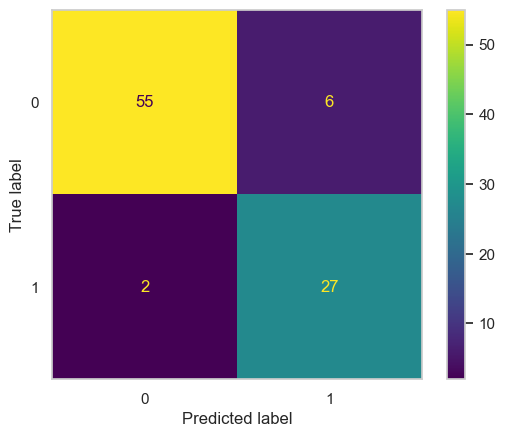

In [59]:
# random forest post-tuning confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, y_pred_test_rf_randcv, labels=rf_randcv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_randcv.classes_)

disp.plot()
plt.show()

### AdaBoost Model Tuning
 Melalui *`trial and error`* penulis mendapati kedua metrik `Recall` dan `F1-score` adalah metric yang terbaik untuk *`tuning`* agar model *`AdaBoost`* tidak overfit terhadap nilai `recall` *train-set*

In [60]:
# choose tuning metric to be optimized for
metric_tuning = 'recall'

# parameter AdaBoost
param_ada = {
    'estimator__n_estimators': [5,10,20,30,40,50], #jumlah weak learner
    'estimator__learning_rate': [0.3,0.5,0.7,0.8],
    'estimator__algorithm': ['SAMME', 'SAMME.R'],
    }

# tuning hyperparameter 
ada_randcv = RandomizedSearchCV(ada_clf, param_distributions=param_ada,n_iter=100, cv=n_split, scoring=metric_tuning, n_jobs=-1, random_state=42)
ada_randcv.fit(X_train_upsampled, y_train_upsampled)
print(f"AdaBoost Model Hyperparameter Tuning...")
print(f"Best cross-validation {metric_tuning}: {ada_randcv.best_score_:.2f}")
print(f"{metric_tuning} test set score: {ada_randcv.score(X_test, y_test):.2f}")
print(f"Best parameters: {ada_randcv.best_params_}")

AdaBoost Model Hyperparameter Tuning...
Best cross-validation recall: 0.84
recall test set score: 0.83
Best parameters: {'estimator__n_estimators': 10, 'estimator__learning_rate': 0.7, 'estimator__algorithm': 'SAMME.R'}


In [61]:
# predict train-set setelah tuning
y_pred_train_ada_randcv = ada_randcv.predict(X_train_upsampled)

# predict test-set setelah tuning
y_pred_test_ada_randcv = ada_randcv.predict(X_test)

In [62]:
# print recall score terhadap test set setelah tuning
recall_score(y_true=y_test,y_pred=y_pred_test_ada_randcv)

0.8275862068965517

`Pre-tuning` `AdaBoost` model mendapat nilai recall terhadap test-set sebesar `0.75`, dan `post-tuning` mendapat nilai sebesar `0.82` terhadap test-set

#### AdaBoost Post-Tuning Model Report
Untuk mengetahui apakah post-tuning model tergolong `overfit`, `underfit`, atau `good-fit`.

In [63]:
# train-set
print(classification_report(y_train_upsampled,y_pred_train_ada_randcv))

# test-set
print(classification_report(y_test,y_pred_test_ada_randcv))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       140
           1       0.86      0.89      0.87       140

    accuracy                           0.87       280
   macro avg       0.87      0.87      0.87       280
weighted avg       0.87      0.87      0.87       280

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        61
           1       0.71      0.83      0.76        29

    accuracy                           0.83        90
   macro avg       0.81      0.83      0.82        90
weighted avg       0.84      0.83      0.84        90



`Post-tuning` model didapati performa test-set `dibawah` train-set sebesar `6%`. Dengan pertimbangan demikian penulis merasa model ini masih `underfit` namun sudah lebih baik dari baseline model.

#### AdaBoost Post-Tuning Confusion Matrix

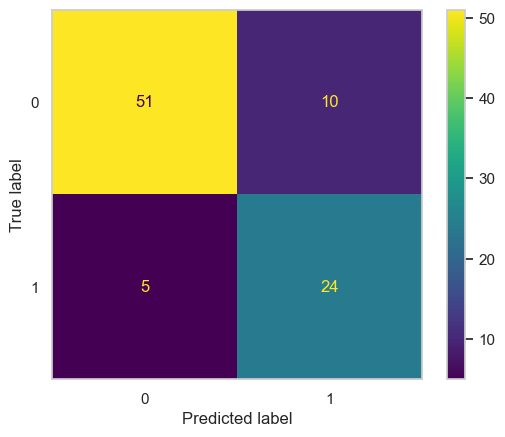

In [64]:
# adaboost post-tuning confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, y_pred_test_ada_randcv, labels=ada_randcv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ada_randcv.classes_)

disp.plot()
plt.show()

### GradientBoost Model Tuning
 Melalui *`trial and error`* penulis mendapati kedua metrik `F1-score` adalah metric yang terbaik untuk *`tuning`* agar model *`GradientBoost`* tidak overfit terhadap nilai `recall` *train-set*

In [65]:
# choose tuning metric to be optimized for
metric_tuning = 'f1'

# parameter AdaBoost
param_gbc = {
    'estimator__n_estimators': [2,4,8,16,32,64,128,256,512], #jumlah weak learner
    'estimator__learning_rate': [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.],
    'estimator__subsample': [.1,.2,.3,.4,.5,.6,.7,.8,.9,1.],
    'estimator__criterion': ['friedman_mse','squared_error'],
    'estimator__min_samples_split':[1,2,4,8,16],
    'estimator__min_samples_leaf':[1,2,4,8,16],
    'estimator__min_weight_fraction_leaf':[.0,.1,.2,.3,.4,.5],
    'estimator__max_depth':[1,2,4,8,16],
    'estimator__min_impurity_decrease': np.arange(0, 1, 0.001).tolist(),
    'estimator__max_leaf_nodes':[1,2,4,8,16,None],
    'estimator__ccp_alpha': np.arange(0, 1, 0.001).tolist(),
    'estimator__tol':[1e-8,1e-6,1e-7,1e-5,1e-4,1e-3,1e-2,1e-1],
    }

# tuning hyperparameter 
gbc_randcv = RandomizedSearchCV(gbc_clf, param_distributions=param_gbc,n_iter=200, cv=n_split, scoring=metric_tuning, n_jobs=-1, random_state=42)
gbc_randcv.fit(X_train_upsampled, y_train_upsampled)
print(f"GradientBoost Model Hyperparameter Tuning...")
print(f"Best cross-validation {metric_tuning}: {gbc_randcv.best_score_:.2f}")
print(f"{metric_tuning} test set score: {gbc_randcv.score(X_test, y_test):.2f}")
print(f"Best parameters: {gbc_randcv.best_params_}")

GradientBoost Model Hyperparameter Tuning...
Best cross-validation f1: 0.80
f1 test set score: 0.79
Best parameters: {'estimator__tol': 0.01, 'estimator__subsample': 0.2, 'estimator__n_estimators': 512, 'estimator__min_weight_fraction_leaf': 0.2, 'estimator__min_samples_split': 16, 'estimator__min_samples_leaf': 2, 'estimator__min_impurity_decrease': 0.96, 'estimator__max_leaf_nodes': 2, 'estimator__max_depth': 2, 'estimator__learning_rate': 0.1, 'estimator__criterion': 'friedman_mse', 'estimator__ccp_alpha': 0.057}


In [66]:
# predict train-set setelah tuning
y_pred_train_gbc_randcv = gbc_randcv.predict(X_train_upsampled)

# predict test-set setelah tuning
y_pred_test_gbc_randcv = gbc_randcv.predict(X_test)

In [67]:
# print recall score terhadap train set setelah tuning
recall_score(y_train_upsampled,y_pred_train_gbc_randcv)

0.8785714285714286

In [68]:
# print recall score terhadap test set setelah tuning
recall_score(y_true=y_test,y_pred=y_pred_test_gbc_randcv)

0.896551724137931

`Pre-tuning` `GradientBoosting` model mendapat nilai recall sebesar `0.79` dan `post-tuning` sebesar `0.89` terhadap test-set

#### GradientBoost Post-Tuning Model Report
Untuk mengetahui apakah post-tuning model tergolong `overfit`, `underfit`, atau `good-fit`.

In [69]:
# train-set
print(classification_report(y_train_upsampled,y_pred_train_gbc_randcv))

# test-set
print(classification_report(y_test,y_pred_test_gbc_randcv))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       140
           1       0.84      0.88      0.86       140

    accuracy                           0.86       280
   macro avg       0.86      0.86      0.86       280
weighted avg       0.86      0.86      0.86       280

              precision    recall  f1-score   support

           0       0.94      0.82      0.88        61
           1       0.70      0.90      0.79        29

    accuracy                           0.84        90
   macro avg       0.82      0.86      0.83        90
weighted avg       0.87      0.84      0.85        90



Post-tuning model didapati performa test-set mencapai angka `90%`, selisih `2%` `diatas` nilai train-setnya yang sebesar `88%%`. Dengan pertimbangan demikian penulis merasa model ini tergolong `good-fit`.

#### GradientBoost Post-Tuning Confusion Matrix

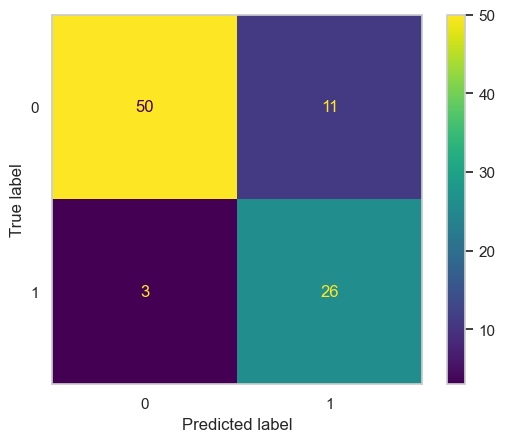

In [70]:
# gradientboost post-tuning confusion matrix
sns.set_style("whitegrid", {'axes.grid' : False})
cm = confusion_matrix(y_test, y_pred_test_gbc_randcv, labels=gbc_randcv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gbc_randcv.classes_)

disp.plot()
plt.show()

# Model Saving

In [71]:
# save tuned-model random forest
with open('rf_randcv.pkl','wb') as file_1:
    joblib.dump(rf_randcv,file_1)

# save tuned-model adaboost
with open('ada_randcv.pkl','wb') as file_2:
    joblib.dump(ada_randcv,file_2)
    
# save tuned-model gradientboost
with open('gbc_randcv.pkl','wb') as file_3:
    joblib.dump(gbc_randcv,file_3)

# Model Deployment
https://huggingface.co/spaces/Astralsparks/prediksi-gagal-jantung

## Conceptual Problems

*Jawab pertanyaan berikut:*

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
> Adanya bagging karena pada machine learning ada problem `bias-variance-tradeoff` dimana bagging membantu mengurangi variance sehingga mencegah overfitting. Cara kerja bagging adalah dengan melatih beberapa model yang sama dan mengambil rerata hasil prediksinya. [sumber](https://blog.paperspace.com/bagging-ensemble-methods/)

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
> `Random forest`,  `AdaBoost`, dan `GradientBoost` merupakan `ensemble learner` namun Random Forest belajar secara `parallel` dengan memanfaatkan beberapa *`decision trees`* sedangkan Adaboost belajar secara `sekuensial` pada base estimatornya (secara default sklearn menggunakan decision tree). Selain itu `Adaboost` mengimplementasikan *`weak learner(s)`* dari base estimator yang belajar berulang kali dimana prediksi data yang salah akan `dibobotkan lebih besar` dari prediksi data yang benar untuk pertimbangan iterasi berikutnya (*`adaptive`*). Untuk `GradientBoost`, teknik ini bekerja seperti adaboost yakni menciptakan beberapa decision tree namun proses optimasi bukan dari pembobotan prediksi yang salah melainkan dari optimasi *`loss function`* menggunakan *`gradient descent `*. berikut [sumber 1](https://vitalflux.com/adaboost-algorithm-explained-with-python-example/) dan [sumber 2](https://blog.paperspace.com/adaboost-optimizer/).

## Conclusion
- `Random Forest`, `AdaBoost`, dan `GradientBoost` merupakan jenis ensemble machine learning model.  
- Metrik `recall` cocok digunakan untuk konteks data yang memiliki urgensi untuk menekan angka false negative dalam konteks ini adalah ketidakmampuan model dalam memprediksi penderita gagal jantung yang sebenarnya.
- Terdapat peningkatan performa recall pada ketiga model setelah dilakukannnya hyperparameter tuning dari masing-masing baseline model.
- Model terbaik untuk kasus ini adalah `GradientBoost` dengan score recall mencapai `0.90`

## Further Improvement
- Perlunya hyperparameter tuning lebih lanjut untuk membuat model yang lebih baik.
- Pemilihan fitur yang lebih selektif berpotensi meningkatkan performa model.